In [13]:
# rich output 출력위치 설정
# => 웹 브라우저에서 바로 봄
get_ipython().run_line_magic('matplotlib', 'inline')

# 색상 출력
# 설치 방법 => pip install termcolor
from termcolor import colored
def c(tag, data, under=3):

    val = colored(tag + ':\n', 'magenta', attrs=['bold'])
    t = type(data)
    val += colored(t, 'magenta')
    under = str(under)
    
    import numpy
    if t is float or t is numpy.float64:
        val += ('\n{:.' + under + 'f}\n').format(data)
    else:
        val += '\n{}\n'.format(data)
    return val

### <span style="color:#26C;background:#EEE">1.7. 첫 번째 애플리케이션: 붓꽃의 품종 분류</span><br>

<img src="../images/iris_petal_sepal.png" style="margin:0;width:300px"/>

- 데이터셋
    - 붓꽃의 꽃잎과 꽃받침의 폭과 길이
    - 품종의 종류 (세 가지라 가정 = setosa, versicolor, virginica)<br><br>
    
- **목표: 새로 채집한 붓꽃의 품종을 예측**

#### <span style="color:#184;background:#EEE">1.7.1. 데이터 적재</span><br>

In [14]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()
print(c('keys of iris_dataset', iris_dataset.keys()))

# 붓꽃 데이터셋의 설명을 보려면 다음을 출력
# print(iris_dataset["DESCR"])

print(c('data names', iris_dataset.feature_names)) # 특성(feature) 종류
print(c('data shape', iris_dataset.data.shape))
print(c('data samples', iris_dataset.data[:10, :])) # 10개만 출력

print(c('target names', iris_dataset.target_names)) # 타겟의 의미
print(c('target shape', iris_dataset.target.shape))
print(c('target samples', iris_dataset.target[:])) # 모두 출력

keys of iris_dataset:
<class 'dict_keys'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

data names:
<class 'list'>
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

data shape:
<class 'tuple'>
(150, 4)

data samples:
<class 'numpy.ndarray'>
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

target names:
<class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']

target shape:
<class 'tuple'>
(150,)

target samples:
<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]



#### <span style="color:#184;background:#EEE">1.7.2. 성과 측정: 훈련 데이터와 테스트 데이터</span><br>

- 모델을 만드는 것도 중요하지만 실제로 잘 동작하는지 평가하는 것도 중요함
- **그런데 모델을 만들 때 쓴 데이터는 평가 목적으로 사용 불가능**
    - 모델이 학습 도중 데이터를 모두 기억할 수 있기 때문
    - 이를 일반화 되지 않았다고 함 (= Overfitting 문제)<br><br>
    
- **<span style="color:#C22">따라서 데이터를 훈련용(train set)과 시험용(test set)으로 나눔</span>**
    - 일반적으로 전체의 25%를 test set으로 사용

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_dataset = load_iris()

# X는 2차원이므로 대문자, y는 1차원이므로 소문자
#
# random_state = 의사 난수 생성기의 초기값
# ==> 항상 같은 결과를 원하면 같은 값을 할당할 것
#
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'],
    iris_dataset['target'],
    test_size=38,
    random_state=0
)

print(c('X_train shape', X_train.shape))
print(c('y_train shape', y_train.shape))
print(c('X_test shape', X_test.shape))
print(c('y_test shape', y_test.shape))

X_train shape:
<class 'tuple'>
(112, 4)

y_train shape:
<class 'tuple'>
(112,)

X_test shape:
<class 'tuple'>
(38, 4)

y_test shape:
<class 'tuple'>
(38,)



#### <span style="color:#184;background:#EEE">1.7.3. 가장 먼저 할 일: 데이터 살펴보기</span><br>

- 비정상적인 값이나 특이한 값을 발견할 수도 있음 (일관성 결여)
- 데이터의 시각화는 큰 도움을 줌
    - 산점도(scatter plot): 한 번에 2개 또는 3개의 특성만 가능

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DB7927AA20>,
      dtype=object)

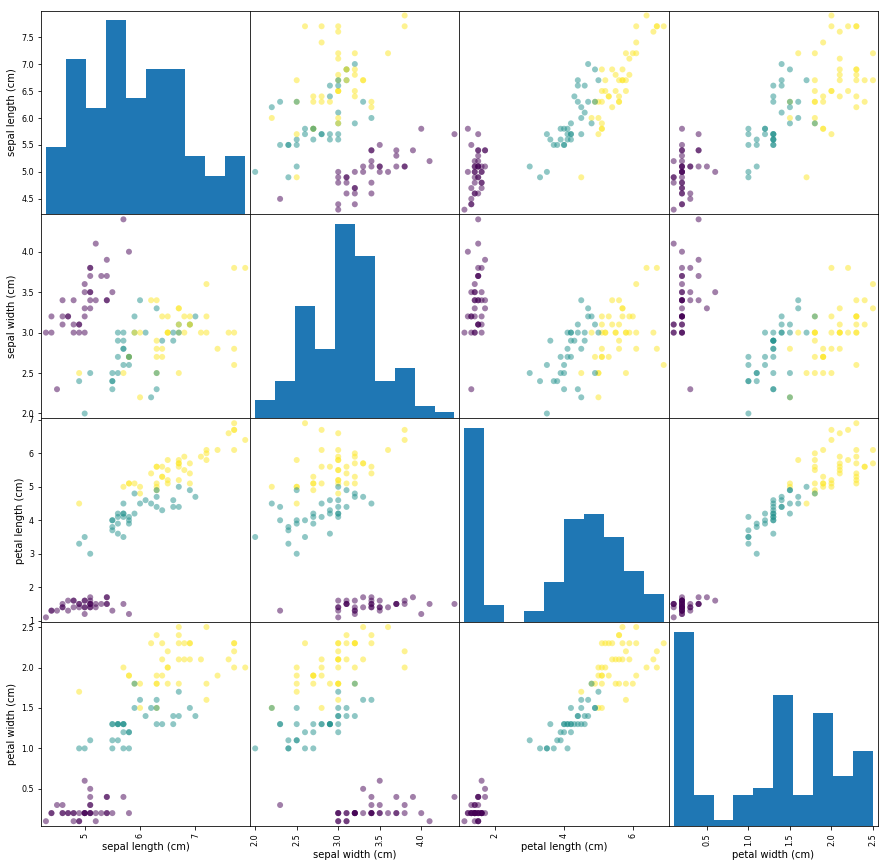

In [16]:
from sklearn.datasets import load_iris
import pandas as pd

iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'],
    iris_dataset['target'],
    test_size=38,
    random_state=0
)

# pandas 모듈 사용
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

# 산점도 행렬(scatter matrix) 생성
pd.plotting.scatter_matrix(
    iris_dataframe,
    c=y_train,
    figsize=(15, 15),
    marker='o'
)

#### <span style="color:#184;background:#EEE">1.7.4. 첫 번째 머신러닝 모델: k-최근접 이웃 알고리즘</span><br>

- 줄여서 k-NN (k-Nearest Neighbors)
- k-NN 분류 알고리즘

    1. 새로운 데이터 포인트에 가장 가까운 k개를 찾음
    2. 그 이웃들의 클래스(분류) 중 빈도가 가장 높은 것을 선택
    
#### <span style="color:#184;background:#EEE">1.7.5. 예측하기</span><br>

- 모델 학습 뒤 모델의 입력을 X_test, 그 출력을 y_pred
- **y_pred와 실제 정답인 y_test를 비교**

#### <span style="color:#184;background:#EEE">1.7.6. 모델 평가하기</span><br>

- score 함수로 측정 가능

In [17]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], 
    iris_dataset['target'],
    test_size=38,
    random_state=0
)

# 모델 생성 및 학습
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

# 학습된 모델로 예측해보기
y_pred = knn.predict(X_test)

# y_pred = 처음보는 데이터에 대한 예측값들
# y_test = 실제 정답
print(c('test set predictions', y_pred))
print(c('test set targets', y_test))

# 평가
print(c('score', knn.score(X_test, y_test)))

test set predictions:
<class 'numpy.ndarray'>
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]

test set targets:
<class 'numpy.ndarray'>
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]

score:
<class 'numpy.float64'>
0.974

